In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import warnings
warnings .filterwarnings('ignore')

LOADING DATASET

In [2]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Top 5 heads of the dataset

In [3]:
df.shape

(4177, 9)

we have 4177 rows and 9 columns in overall dataset

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

we have 1 column belongs to object data type ,1 column is for integer data type and 7 columns is for float data type

In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

showing name of the each  column

In [6]:
df.keys

<bound method NDFrame.keys of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415 

showing the information of the every column

In [7]:
df.describe

<bound method NDFrame.describe of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1



STATISTICAL SUMMARY


In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


EXPLORATORY DATA    ANALYSIS

In [9]:
# checking Null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

no null values

<AxesSubplot:>

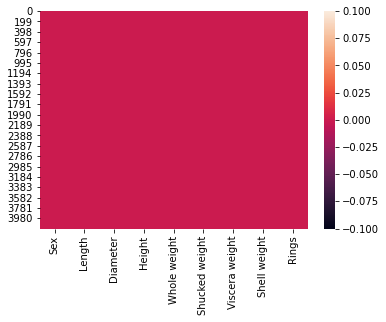

In [10]:
#checking null value through heatmap
sns.heatmap(df.isnull())

no null values


UNIVARIATE ANALYSIS


<AxesSubplot:xlabel='Sex', ylabel='count'>

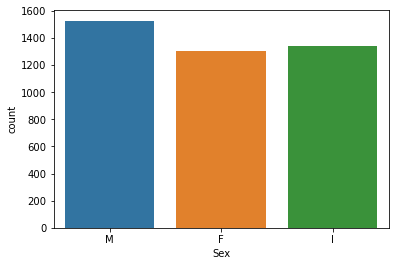

In [11]:
sns.countplot(df['Sex'])

M is representing Male , F is representing Female and I is representing Infant

In [12]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

The number of Male abalone is 1528 , the number Of Female abalone is 1342 and the number of infant abalone is 1307

<AxesSubplot:xlabel='Rings', ylabel='count'>

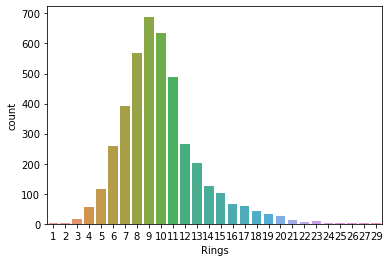

In [13]:
sns.countplot(df['Rings'])

In [14]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

showing the value counts of the rings

BIVARIATE ANALYSIS

<AxesSubplot:title={'center':' comparison between happiness length  and rings'}, xlabel='Length', ylabel='Rings'>

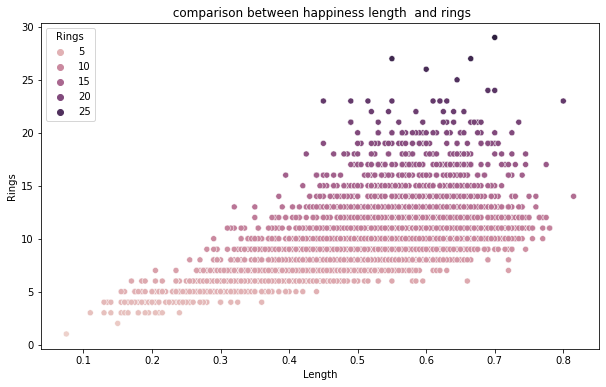

In [15]:
plt.figure(figsize=[10,6])
plt.title(' comparison between happiness length  and rings')
sns.scatterplot(df['Length'], df['Rings'],hue=df['Rings'])

This plot indiactes positive comparison that is when Length is increasing Rings is also increasing

<AxesSubplot:title={'center':' comparison between happiness height  and rings'}, xlabel='Height', ylabel='Rings'>

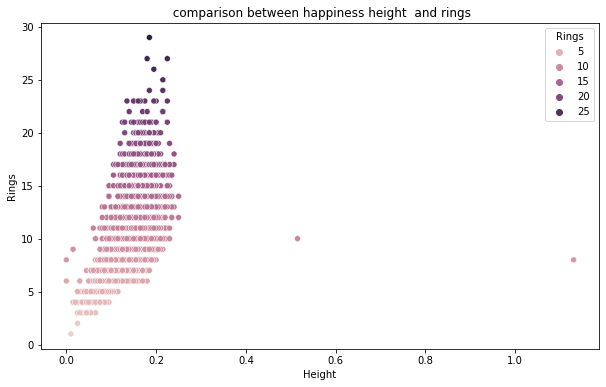

In [16]:
plt.figure(figsize=[10,6])
plt.title(' comparison between happiness height  and rings')
sns.scatterplot(df['Height'], df['Rings'],hue=df['Rings'])

This also indicates positivity between Height and Rings ,but as we can see in the plot that we have  2 outliers present in it

<AxesSubplot:title={'center':' comparison between happiness diameter  and rings'}, xlabel='Diameter', ylabel='Rings'>

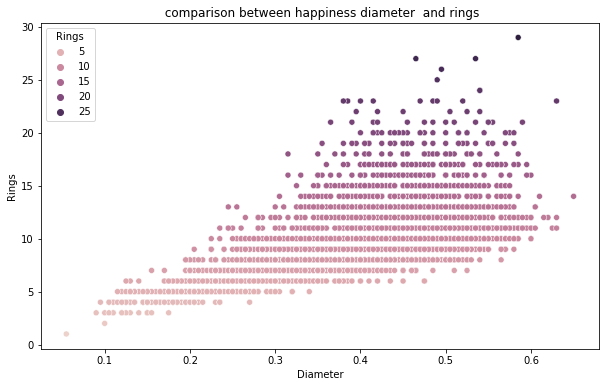

In [17]:
plt.figure(figsize=[10,6])
plt.title(' comparison between happiness diameter  and rings')
sns.scatterplot(df['Diameter'], df['Rings'],hue=df['Rings'])

As we can see here when Diameter is increasing Rings is also incresing, and 1 or 2 outliers are present in this.

<AxesSubplot:title={'center':' comparison between happiness whole weight  and rings'}, xlabel='Whole weight', ylabel='Rings'>

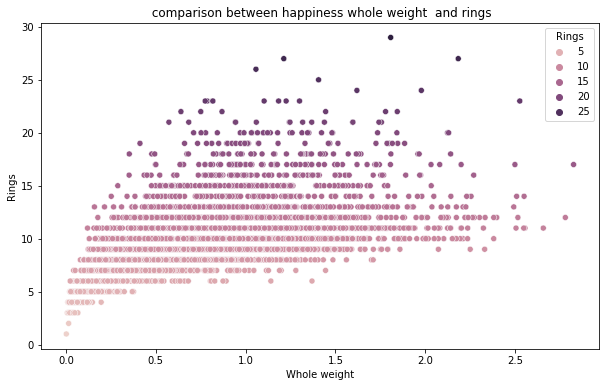

In [18]:
plt.figure(figsize=[10,6])
plt.title(' comparison between happiness whole weight  and rings')
sns.scatterplot(df['Whole weight'], df['Rings'],hue=df['Rings'])

Whole weight and Rings are showing positiviy between each other , but some outliers are present

<AxesSubplot:title={'center':' comparison between happiness shucked weight  and rings'}, xlabel='Shucked weight', ylabel='Rings'>

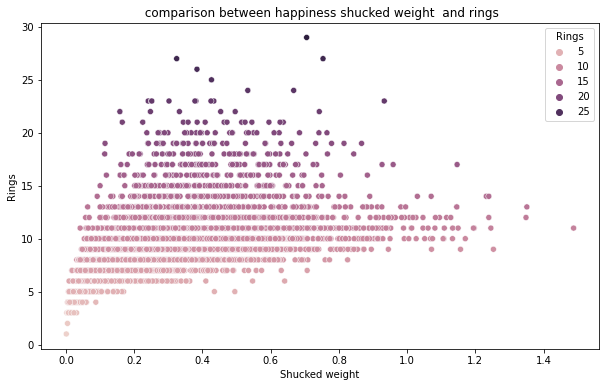

In [19]:
plt.figure(figsize=[10,6])
plt.title(' comparison between happiness shucked weight  and rings')
sns.scatterplot(df['Shucked weight'], df['Rings'],hue=df['Rings'])

This plot idicates that Shucked weight is increasing then Rings is also increasing

<AxesSubplot:title={'center':' comparison between Viscera Weight length  and rings'}, xlabel='Viscera weight', ylabel='Rings'>

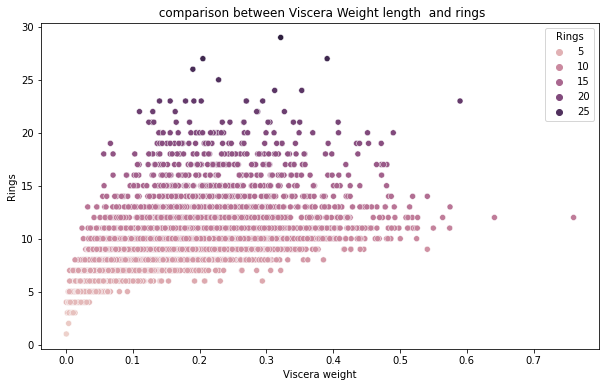

In [20]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Viscera Weight length  and rings')
sns.scatterplot(df['Viscera weight'], df['Rings'],hue=df['Rings'])

viscera weight is increasing Rings is increasing , but outliers are present

<AxesSubplot:title={'center':' comparison between happiness shell weight  and rings'}, xlabel='Shell weight', ylabel='Rings'>

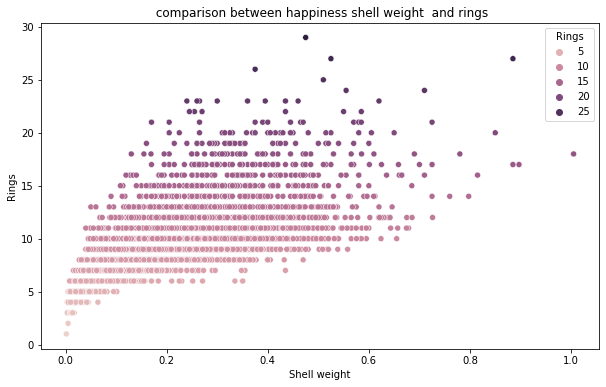

In [21]:
plt.figure(figsize=[10,6])
plt.title(' comparison between happiness shell weight  and rings')
sns.scatterplot(df['Shell weight'], df['Rings'],hue=df['Rings'])

Shell weight is increasing then Rings is increasing and outliers are present



MULTIVARIATE ANALYSIS

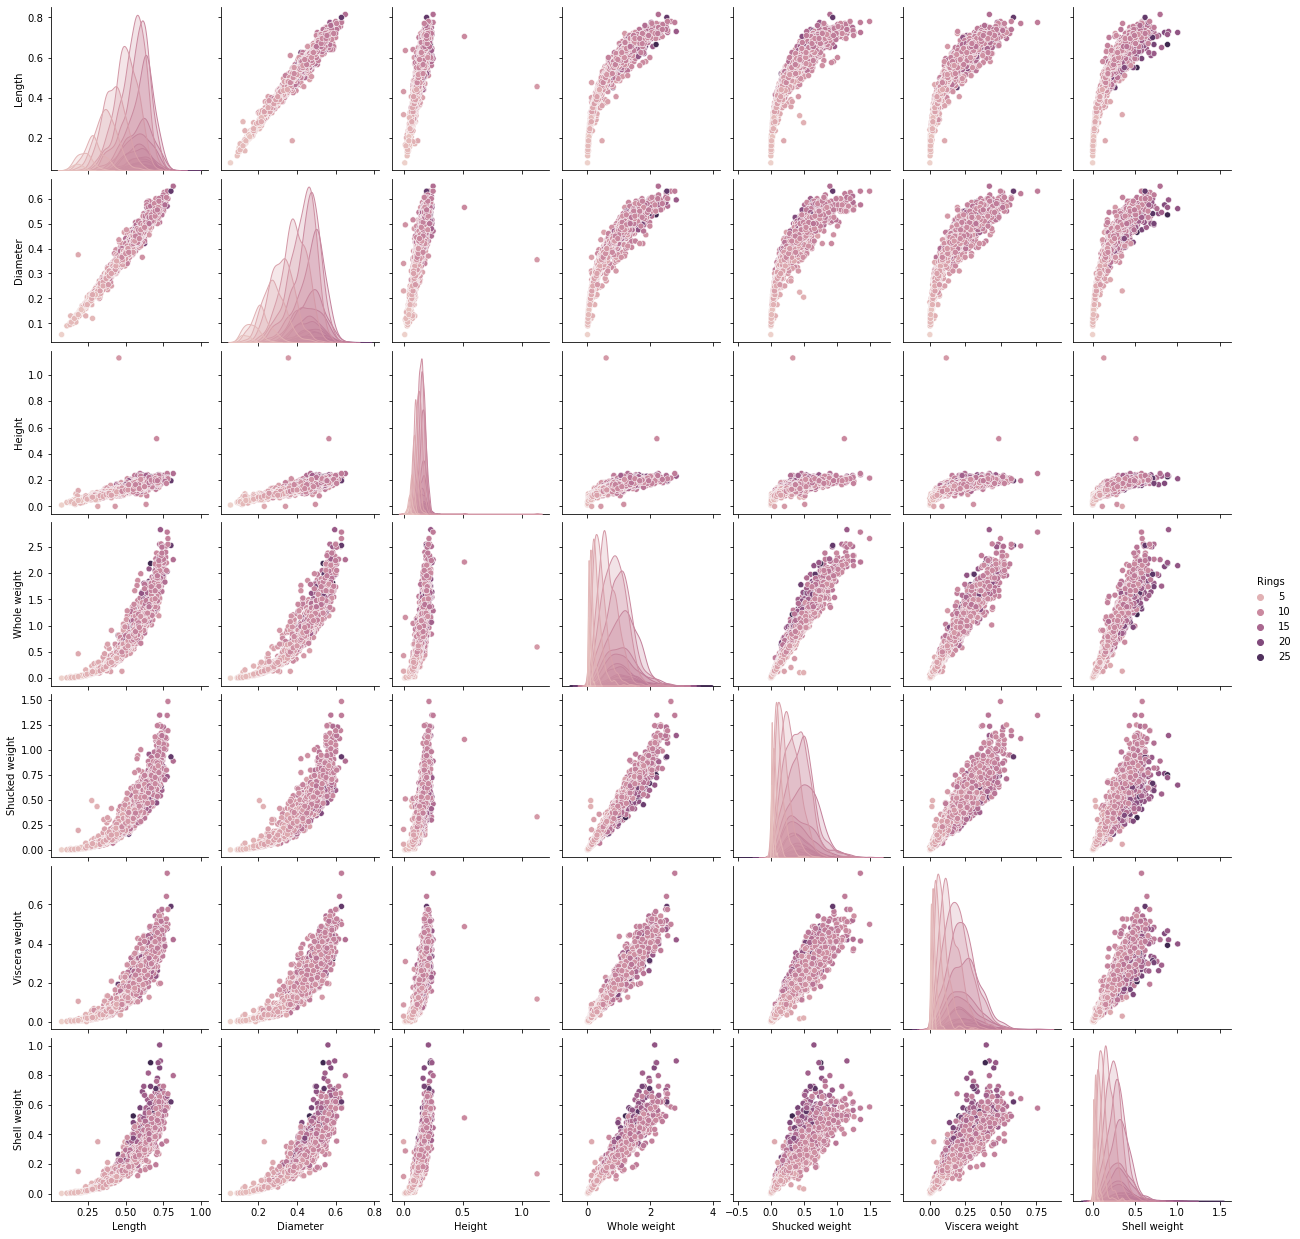

In [23]:
sns.pairplot(df, hue='Rings')

Pair plot is showig each and evry columns in a single look and indiacting relationship ,comparison outliers and many more between them.

In [22]:
# CORRELATION
cor=df.corr()
cor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<Figure size 720x720 with 0 Axes>

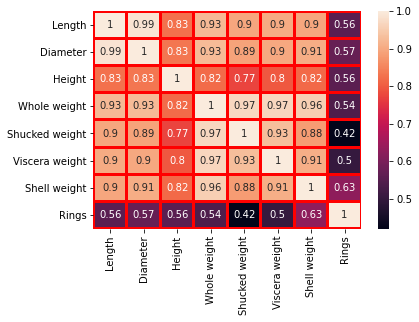

<Figure size 720x720 with 0 Axes>

In [23]:
# SHOWING CORRELATION THROUGH HEATMAP
sns.heatmap(cor,annot=True, linewidths=2, linecolor='r')
plt.figure(figsize=(10,10))

Length is showing positive correlation with Diameter.
Height is showing positive correlation with with every column.

In this Heatmap, most of the columns are showing positive correlation between each other.

Light shades is indiacting Highly positive correlatin

FEATURE ENGINEERING

ONE HOT ENCODING

In [77]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [78]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [79]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


NOW , we can see that object data type column is converted into integer

In [81]:
df.shape

(4177, 9)

CHECKING SKEWNESS

In [82]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

The columns are in range betwwen +5 and -5 are not skewed.
skewed columns are Length ,Diameter, Height ,Shucked weight, Shell weight,Rings

OUTLIERS CHECKING

<AxesSubplot:>

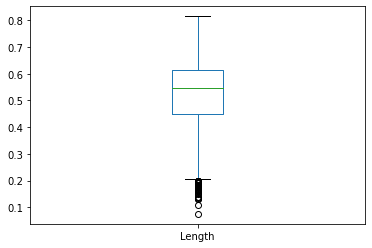

In [36]:
df['Length'].plot.box()

very close outliers present here in this column

<AxesSubplot:>

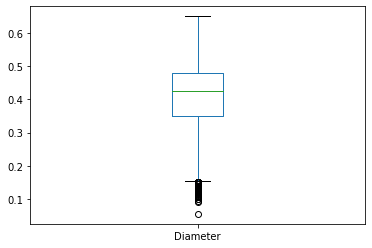

In [37]:
df['Diameter'].plot.box()

very close outliers present here in this column

<AxesSubplot:>

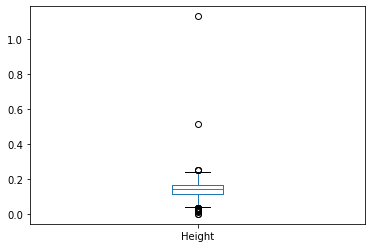

In [38]:
df['Height'].plot.box()

outliers are very far from the boxplot ,so we have to remove it from this column

<AxesSubplot:>

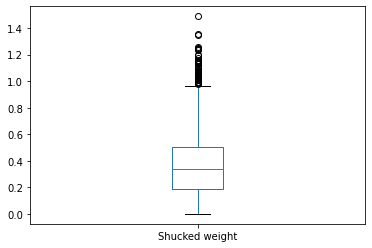

In [39]:
df['Shucked weight'].plot.box()

close outliers are present in this column

<AxesSubplot:>

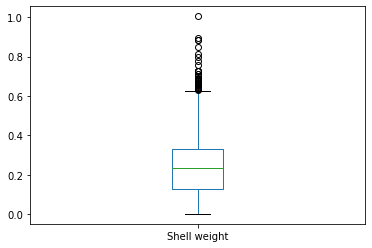

In [40]:
df['Shell weight'].plot.box()

close outliers are present in this column

SPLITTING THE DATASET

In [86]:
x=df.drop('Rings',axis=1)
y=df['Rings']

In [87]:
x=df.drop('Sex',axis=1)

TRAIN TEST SPLIT

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)

In [100]:
x_train.shape

(3341, 8)

In [101]:
y_train.shape

(3341,)




MODEL BUILDING

In [103]:

from sklearn.metrics import r2_score


#for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print(r2_score(y_test,pred_y))

1.0


100% r2 score from Linear regression

In [104]:
#For Lasso

ls=Lasso()

ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print(r2_score(y_test,pred_y))


0.9905420285031785


99% r2 score from Lasso

In [105]:
# For Ridge

rd=Ridge()

rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print(r2_score(y_test,pred_y))

0.9999999983780086


99% r2 score from Ridge

In [106]:
#For ElasticNet

en=ElasticNet()

en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print(r2_score(y_test,pred_y))

0.991398736047422


99% r2 score from ElasticNet

these r2 score is comming very ,may be it is beacuse of overfitting ,so checking from cross validation is necessary

CROSS VALIDATION

In [110]:
#For Linear Regression


score=cross_val_score(lr,x,y,cv=5)
print('cv score',np.mean(score))

cv score 1.0


getting 100% cv score for Linear regression

In [128]:
#Lasso


score=cross_val_score(ls,x,y,cv=5)print('cv score',np.mean(score))9

cv score 0.9882067267631195


getting 98% cv score for Lasso

In [112]:
# For Ridge


score=cross_val_score(rd,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.9999999978572849


getting 99% cv score for Ridge

In [114]:

#For ElasticNet

score=cross_val_score(en,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.989321749514611


getting 98% cv score for ElasticNet

HYPER PARAMETER TUNING

In [125]:
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [127]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('r2 score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score',rfc*100)

r2 score: 99.98316882941107
cross val score 99.94797287692425


so on the basis of above predictions , we can say every model is prforming extremly well with almost 99% accuracy

SAVING THE MODEL

In [129]:
import pickle
filename='abalone.pkl'
pickle.dump(rf,open(filename,'wb'))